In [46]:
# Step 0: Imports, settings, and load the dataset
import pandas as pd
import numpy as np


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Read the CSV (adjust path if needed)
df = pd.read_csv("/content/titanic.csv")


In [49]:
# Basic shape and a quick peek
print("Shape:", df.shape)
display(df.head(5))

Shape: (891, 15)


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [50]:
# Dtypes and non-null counts
buf = []
import io
s = io.StringIO()
df.info(buf=s)
print(s.getvalue())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB



In [51]:
# Step 1: Descriptive overview

# 1) Missing values per column
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing, "\n")

Missing values per column:
 deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64 



In [52]:
# 2) Summary stats for numeric + categorical
#    (include='all' gives you both numeric and object summaries)
desc = df.describe(include='all').T
display(desc)

count unique          top freq       mean        std   min  \
survived     891.0    NaN          NaN  NaN   0.383838   0.486592   0.0   
pclass       891.0    NaN          NaN  NaN   2.308642   0.836071   1.0   
sex            891      2         male  577        NaN        NaN   NaN   
age          714.0    NaN          NaN  NaN  29.699118  14.526497  0.42   
sibsp        891.0    NaN          NaN  NaN   0.523008   1.102743   0.0   
parch        891.0    NaN          NaN  NaN   0.381594   0.806057   0.0   
fare         891.0    NaN          NaN  NaN  32.204208  49.693429   0.0   
embarked       889      3            S  644        NaN        NaN   NaN   
class          891      3        Third  491        NaN        NaN   NaN   
who            891      3          man  537        NaN        NaN   NaN   
adult_male     891      2         True  537        NaN        NaN   NaN   
deck           203      7            C   59        NaN        NaN   NaN   
embark_town    889      3  Southampton  644        NaN        NaN   NaN   
alive          891      2           no  549        NaN        NaN   NaN   
alone          891      2         True  537        NaN        NaN   NaN   

                25%      50%   75%       max  
survived        0.0      0.0   1.0       1.0  
pclass          2.0      3.0   3.0       3.0  
sex             NaN      NaN   NaN       NaN  
age          20.125     28.0  38.0      80.0  
sibsp           0.0      0.0   1.0       8.0  
parch           0.0      0.0   0.0       6.0  
fare         7.9104  14.4542  31.0  512.3292  
embarked        NaN      NaN   NaN       NaN  
class           NaN      NaN   NaN       NaN  
who             NaN      NaN   NaN       NaN  
adult_male      NaN      NaN   NaN       NaN  
deck            NaN      NaN   NaN       NaN  
embark_town     NaN      NaN   NaN       NaN  
alive           NaN      NaN   NaN       NaN  
alone           NaN      NaN   NaN       NaN

In [53]:
# 3) Numeric correlations (to see linear associations)
num_corr = df.select_dtypes(include=[np.number]).corr(numeric_only=True)
display(num_corr)

survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

In [54]:
# 4) Simple group summaries for the target (survival rate by groups)
group_summaries = {
    "survival_rate_by_sex": df.groupby("sex")["survived"].mean().sort_values(ascending=False),
    "survival_rate_by_pclass": df.groupby("pclass")["survived"].mean(),
    "survival_rate_by_embarked": df.groupby("embarked")["survived"].mean(),
    "survival_rate_by_alone": df.groupby("alone")["survived"].mean()
}
for title, series in group_summaries.items():
    print(f"\n{title.replace('_',' ').title()}:")
    display(series.round(3))


Survival Rate By Sex:


sex
female    0.742
male      0.189
Name: survived, dtype: float64


Survival Rate By Pclass:


pclass
1    0.630
2    0.473
3    0.242
Name: survived, dtype: float64


Survival Rate By Embarked:


embarked
C    0.554
Q    0.390
S    0.337
Name: survived, dtype: float64


Survival Rate By Alone:


alone
False    0.506
True     0.304
Name: survived, dtype: float64

## **Basic Statistics Of 5 Columns.**

In [55]:
# Choose 5 important columns
important_cols = ["age", "fare", "pclass", "sibsp", "parch"]

In [56]:
# Create an empty dictionary to store results
stats_summary = {}

In [57]:
# Loop through each column and compute required statistics
for col in important_cols:
    stats_summary[col] = {
        "Mean": df[col].mean(),                # Average value
        "Median": df[col].median(),            # Middle value
        "Mode": df[col].mode()[0],             # Most frequent value (take first if multiple modes)
        "Std Dev": df[col].std(),              # Spread/dispersion
        "Min": df[col].min(),                  # Smallest value
        "Max": df[col].max()                   # Largest value
    }


In [58]:
# Convert dictionary to DataFrame for nicer display
stats_df = pd.DataFrame(stats_summary).T
display(stats_df.round(2))

Mean  Median   Mode  Std Dev   Min     Max
age     29.70   28.00  24.00    14.53  0.42   80.00
fare    32.20   14.45   8.05    49.69  0.00  512.33
pclass   2.31    3.00   3.00     0.84  1.00    3.00
sibsp    0.52    0.00   0.00     1.10  0.00    8.00
parch    0.38    0.00   0.00     0.81  0.00    6.00

## **Checking for the Missing Values and Outliers**

##

In [59]:
# Step 3a: Missing Values check

# Percentage of missing values per column
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values per Column:\n")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Percentage of Missing Values per Column:

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64


In [60]:
# Step 3b: Outlier Detection using IQR Method

numeric_cols = ["age", "fare", "sibsp", "parch"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile Range
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    print(f"\nColumn: {col}")
    print(f"  Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"  Outliers Count: {outliers.count()}")
    print(f"  Example Outliers: {outliers.head().to_list()}")


Column: age
  Lower Bound: -6.69, Upper Bound: 64.81
  Outliers Count: 11
  Example Outliers: [66.0, 65.0, 71.0, 70.5, 65.0]

Column: fare
  Lower Bound: -26.72, Upper Bound: 65.63
  Outliers Count: 116
  Example Outliers: [71.2833, 263.0, 146.5208, 82.1708, 76.7292]

Column: sibsp
  Lower Bound: -1.50, Upper Bound: 2.50
  Outliers Count: 46
  Example Outliers: [3, 4, 3, 3, 4]

Column: parch
  Lower Bound: 0.00, Upper Bound: 0.00
  Outliers Count: 213
  Example Outliers: [1, 2, 1, 5, 1]


## **Univariate Analysis**

In [61]:
# Set a clean style for plots
sns.set(style="whitegrid")


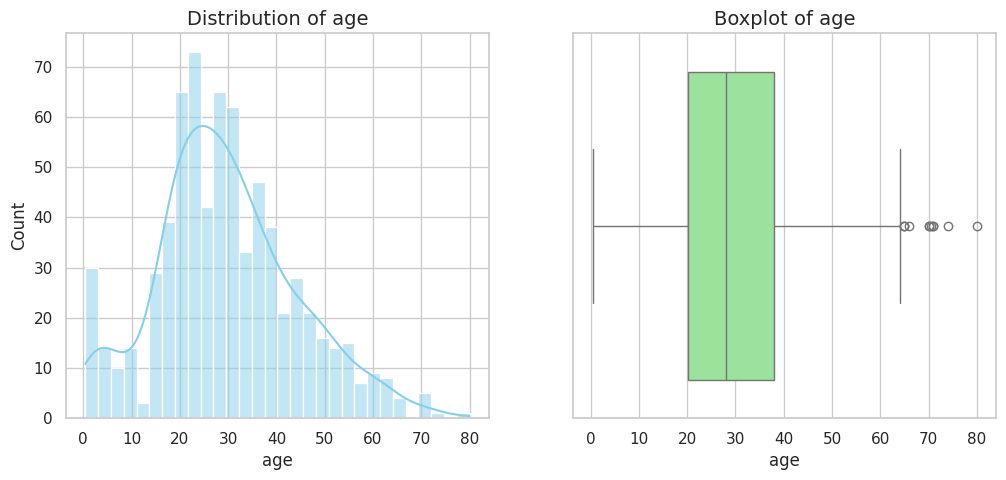

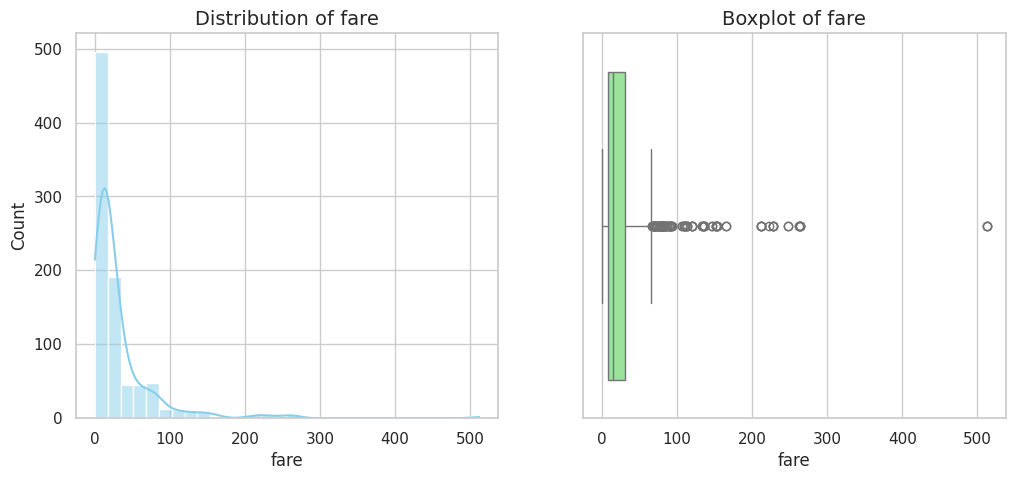

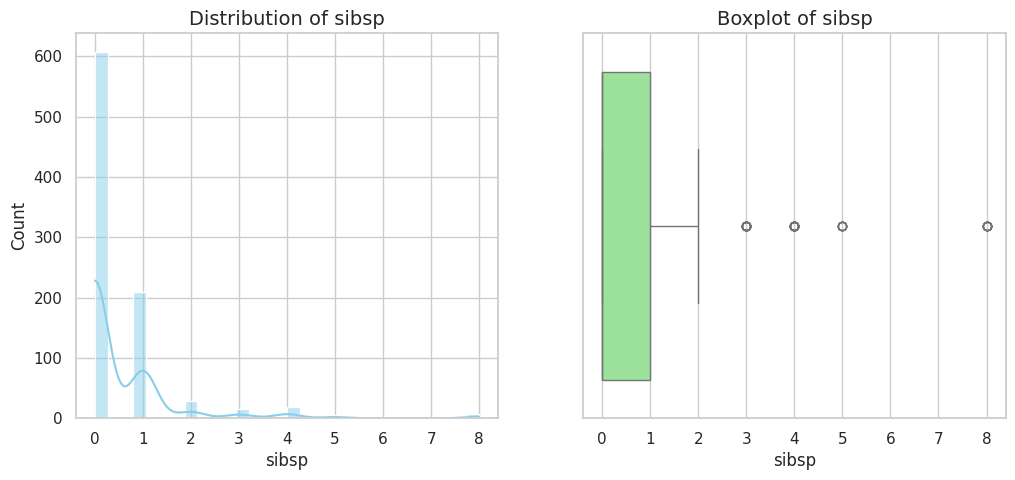

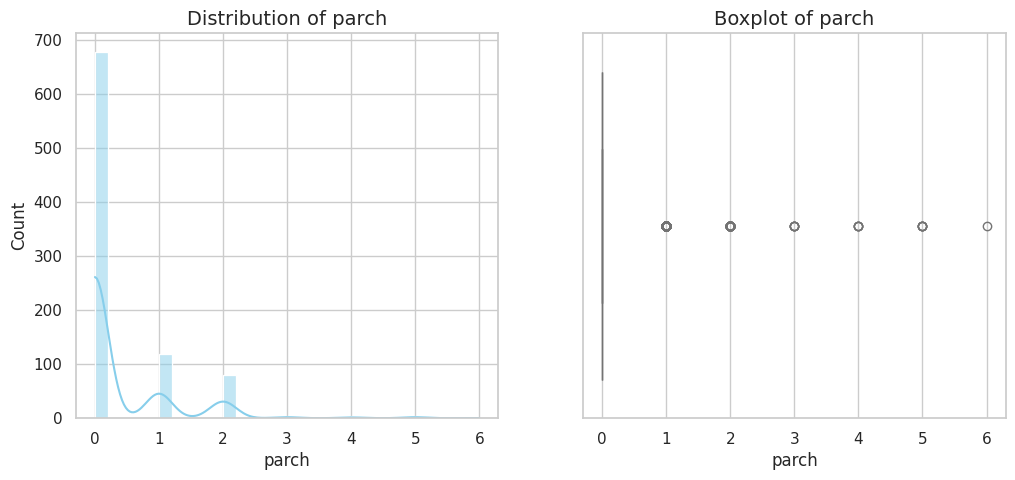

In [62]:
# 1) Numeric variables: age, fare, sibsp, parch
numeric_cols = ["age", "fare", "sibsp", "parch"]

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE (density curve)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=14)

    # Boxplot for outlier detection
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}", fontsize=14)

    plt.show()

/tmp/ipython-input-765535515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


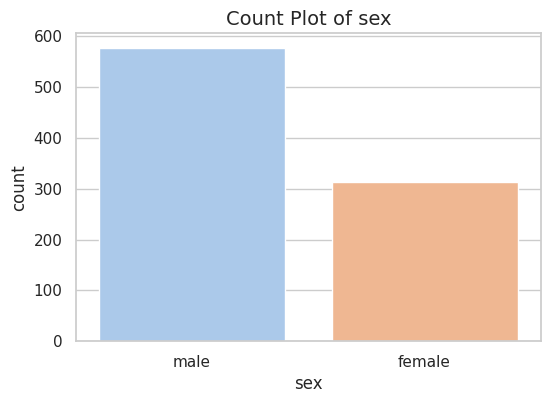

/tmp/ipython-input-765535515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


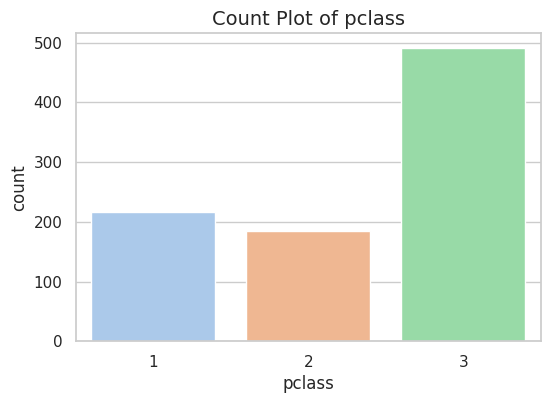

/tmp/ipython-input-765535515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


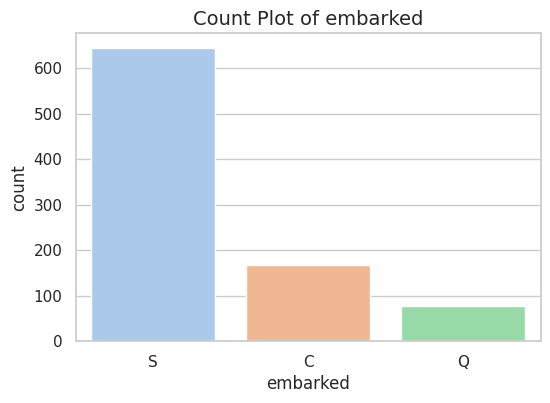

/tmp/ipython-input-765535515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


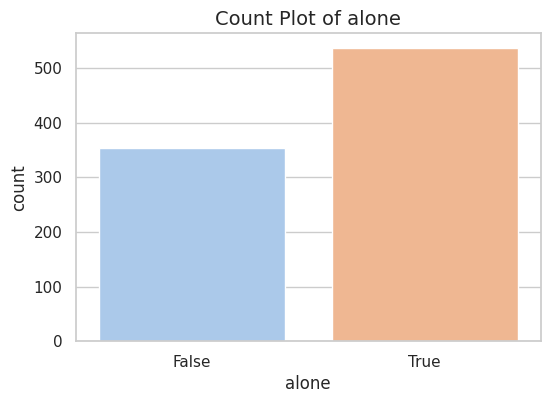

In [63]:
# 2) Categorical variables: sex, pclass, embarked, alone
categorical_cols = ["sex", "pclass", "embarked", "alone"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Count Plot of {col}", fontsize=14)
    plt.show()

## **BI-Variate Aanlysis**

/tmp/ipython-input-1998774852.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="survived", data=df, palette="pastel", estimator=lambda x: sum(x)/len(x))


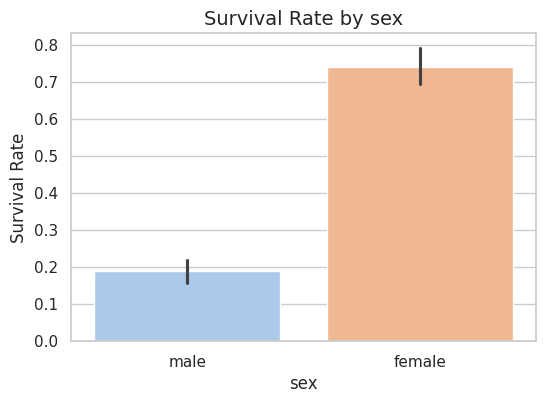

/tmp/ipython-input-1998774852.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="survived", data=df, palette="pastel", estimator=lambda x: sum(x)/len(x))


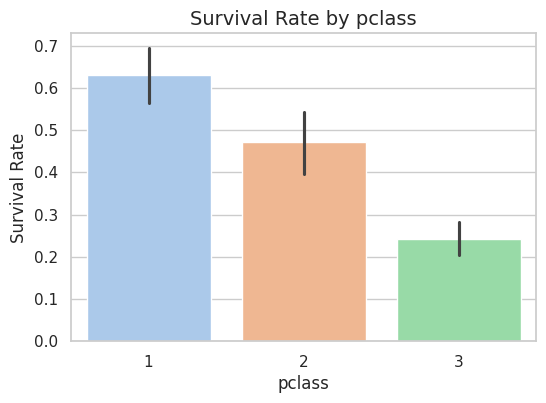

/tmp/ipython-input-1998774852.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="survived", data=df, palette="pastel", estimator=lambda x: sum(x)/len(x))


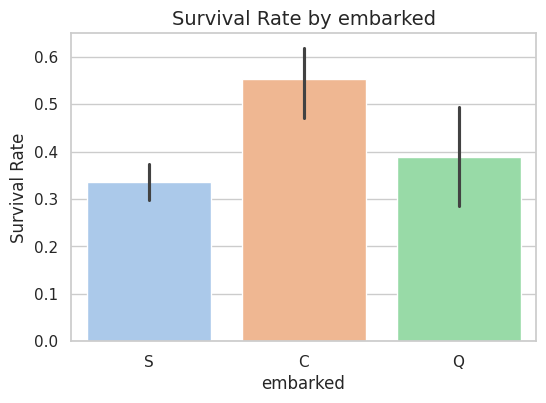

/tmp/ipython-input-1998774852.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="survived", data=df, palette="pastel", estimator=lambda x: sum(x)/len(x))


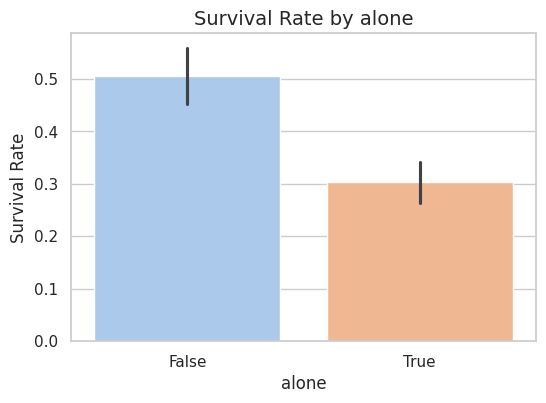

In [64]:
# Step 4: Bivariate Analysis

# 1) Categorical vs Target (survived)
categorical_cols = ["sex", "pclass", "embarked", "alone"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y="survived", data=df, palette="pastel", estimator=lambda x: sum(x)/len(x))
    plt.title(f"Survival Rate by {col}", fontsize=14)
    plt.ylabel("Survival Rate")
    plt.show()


/tmp/ipython-input-3967483046.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y=col, data=df, palette="Set2")


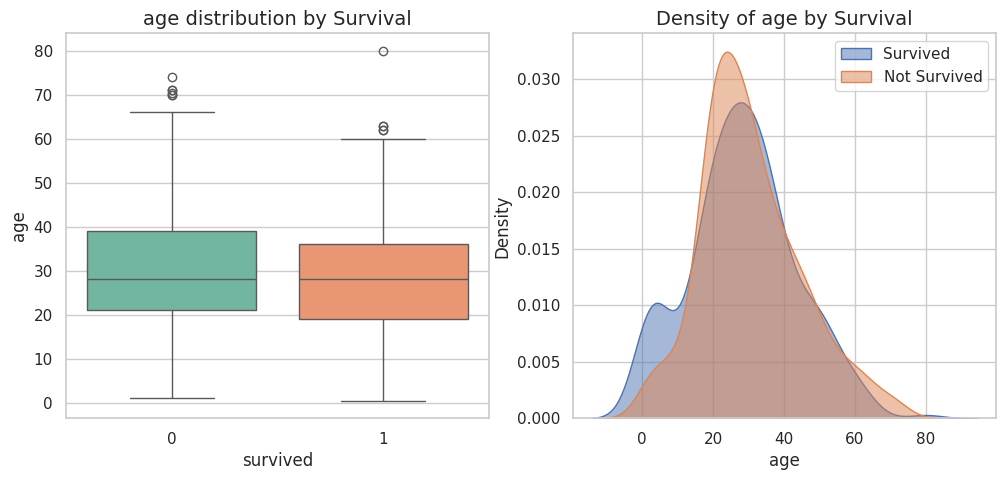

/tmp/ipython-input-3967483046.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y=col, data=df, palette="Set2")


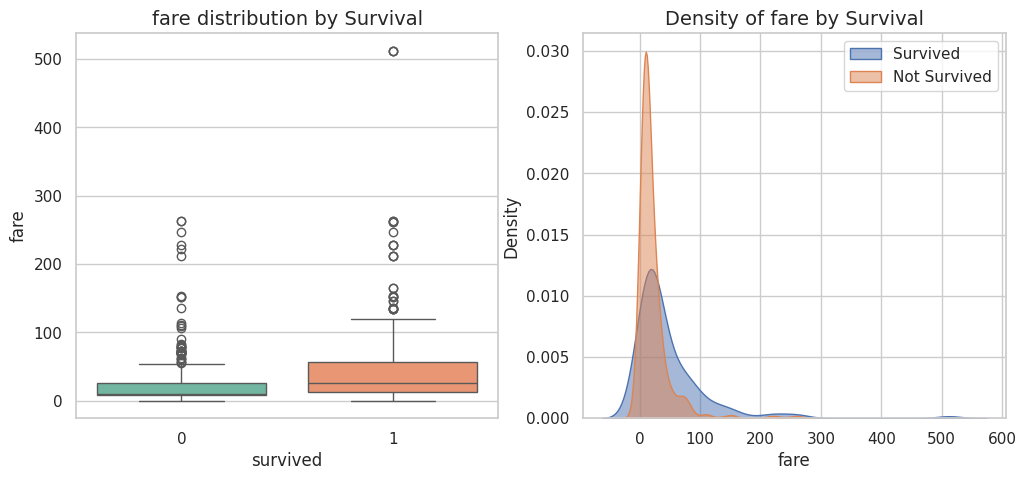

In [65]:
# 2) Numeric vs Target (age, fare)
numeric_cols = ["age", "fare"]

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Boxplot: survival effect on distribution
    plt.subplot(1, 2, 1)
    sns.boxplot(x="survived", y=col, data=df, palette="Set2")
    plt.title(f"{col} distribution by Survival", fontsize=14)

    # KDE plots: survival vs non-survival
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df[df["survived"] == 1][col], label="Survived", fill=True, alpha=0.5)
    sns.kdeplot(data=df[df["survived"] == 0][col], label="Not Survived", fill=True, alpha=0.5)
    plt.title(f"Density of {col} by Survival", fontsize=14)
    plt.legend()

    plt.show()

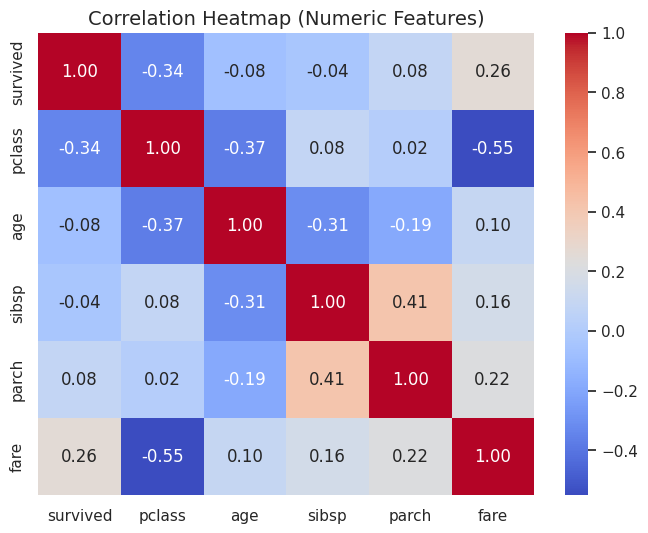

In [66]:
# 3) Correlation heatmap for numeric columns
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
plt.show()

# **THANK YOU**
### Jay sir, for your assistance and guidance on GEN AI course and I am really grateful for that. Since, I didn't interact much but I will always be grateful to you. THANK YOU SIR....!!!!!
“Thank you for your constant guidance and support. Your teaching has inspired me to learn with passion and confidence.”